In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
copy_df = df.copy()

In [64]:
df = pd.read_csv("Crime prediction.csv")
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,12592454,JF113025,1/14/2022 15:55,067XX S MORGAN ST,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,RESIDENCE,False,True,...,16.0,68,26,1170805.0,1860170.0,2022,9/14/2023 15:41,41.771782,-87.649437,"(41.771782439, -87.649436929)"
1,12785595,JF346553,8/5/2022 21:00,072XX S UNIVERSITY AVE,1544,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,APARTMENT,True,False,...,5.0,69,17,1185135.0,1857211.0,2022,9/14/2023 15:41,41.763338,-87.597001,"(41.763337967, -87.597001131)"
2,12808281,JF373517,8/14/2022 14:00,055XX W ARDMORE AVE,1562,SEX OFFENSE,AGGRAVATED CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,...,39.0,11,17,1138383.0,1937953.0,2022,9/14/2023 15:41,41.985875,-87.766404,"(41.985875279, -87.766403857)"
3,12888104,JF469015,11/10/2022 3:47,072XX S MAY ST,1477,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,STREET,False,False,...,17.0,68,15,1169903.0,1856822.0,2022,9/14/2023 15:41,41.762615,-87.652840,"(41.76261474, -87.652840463)"
4,13209277,JG422539,8/15/2022 9:00,0000X W JACKSON BLVD,810,THEFT,OVER $500,COMMERCIAL / BUSINESS OFFICE,False,False,...,4.0,32,6,NaN,NaN,2022,9/14/2023 15:43,NaN,NaN,NaN


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239558 entries, 0 to 239557
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    239558 non-null  int64  
 1   Case Number           239558 non-null  object 
 2   Date                  239558 non-null  object 
 3   Block                 239558 non-null  object 
 4   IUCR                  239558 non-null  object 
 5   Primary Type          239558 non-null  object 
 6   Description           239558 non-null  object 
 7   Location Description  238593 non-null  object 
 8   Arrest                239558 non-null  bool   
 9   Domestic              239558 non-null  bool   
 10  Beat                  239558 non-null  int64  
 11  District              239558 non-null  int64  
 12  Ward                  239548 non-null  float64
 13  Community Area        239558 non-null  int64  
 14  FBI Code              239558 non-null  object 
 15  

In [66]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,12592454,JF113025,1/14/2022 15:55,067XX S MORGAN ST,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,RESIDENCE,False,True,...,16.0,68,26,1170805.0,1860170.0,2022,9/14/2023 15:41,41.771782,-87.649437,"(41.771782439, -87.649436929)"
1,12785595,JF346553,8/5/2022 21:00,072XX S UNIVERSITY AVE,1544,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,APARTMENT,True,False,...,5.0,69,17,1185135.0,1857211.0,2022,9/14/2023 15:41,41.763338,-87.597001,"(41.763337967, -87.597001131)"
2,12808281,JF373517,8/14/2022 14:00,055XX W ARDMORE AVE,1562,SEX OFFENSE,AGGRAVATED CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,...,39.0,11,17,1138383.0,1937953.0,2022,9/14/2023 15:41,41.985875,-87.766404,"(41.985875279, -87.766403857)"
3,12888104,JF469015,11/10/2022 3:47,072XX S MAY ST,1477,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,STREET,False,False,...,17.0,68,15,1169903.0,1856822.0,2022,9/14/2023 15:41,41.762615,-87.652840,"(41.76261474, -87.652840463)"
4,13209277,JG422539,8/15/2022 9:00,0000X W JACKSON BLVD,810,THEFT,OVER $500,COMMERCIAL / BUSINESS OFFICE,False,False,...,4.0,32,6,NaN,NaN,2022,9/14/2023 15:43,NaN,NaN,NaN


In [70]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

df.dropna(inplace=True)

Missing Values:
 ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64


In [69]:
df.dropna(inplace=True)
df['Primary Type'].value_counts()

,count
Primary Type,
THEFT,53621
BATTERY,40800
CRIMINAL DAMAGE,27028
MOTOR VEHICLE THEFT,21386
ASSAULT,20737
DECEPTIVE PRACTICE,14737
OTHER OFFENSE,14369
ROBBERY,8952
WEAPONS VIOLATION,8709


<ipython-input-75-30f380a59195>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Primary Type', palette='viridis', legend=False)


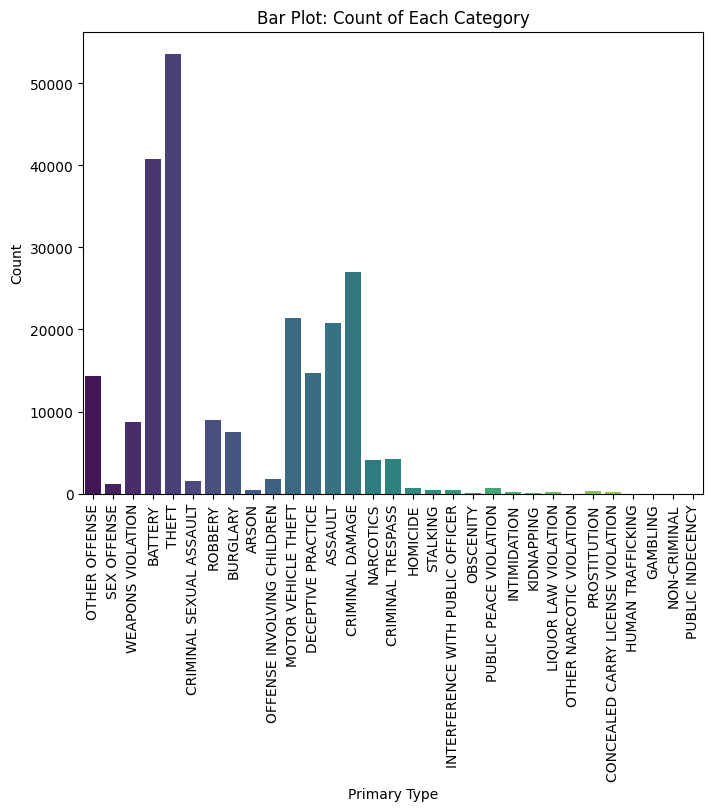

In [75]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Primary Type', palette='viridis', legend=False)
plt.title('Bar Plot: Count of Each Category')
plt.xlabel('Primary Type')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

In [77]:
df['Arrest'].value_counts()

,count
Arrest,
False,207001
True,27237


<ipython-input-90-8831e96c9744>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Arrest', palette='magma', dodge=False, hue=None)


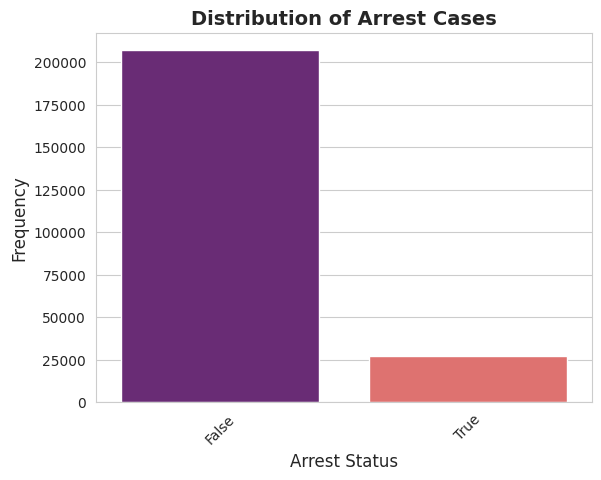

In [90]:
sns.set_style("whitegrid")
sns.countplot(data=df, x='Arrest', palette='magma', dodge=False, hue=None)
plt.title('Distribution of Arrest Cases', fontsize=14, fontweight='bold')
plt.xlabel('Arrest Status', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.show()

<ipython-input-99-b1cce0347553>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


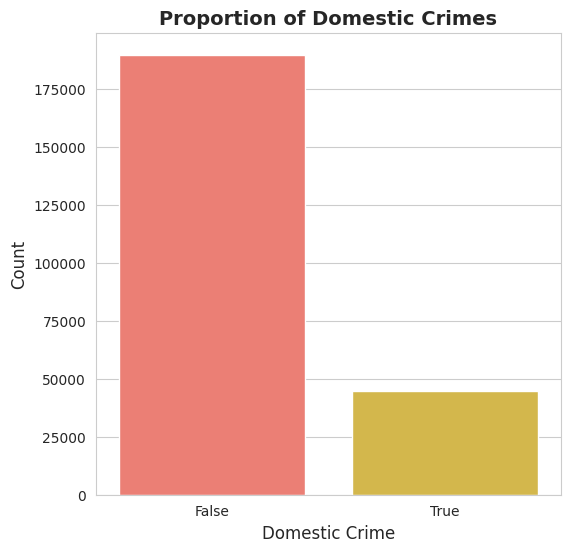

In [99]:
plt.figure(figsize=(6, 6))
domestic_counts = copy_df["Domestic"].value_counts()

sns.barplot(
    x=domestic_counts.index,
    y=domestic_counts.values,
    palette=["#FF6F61", "#EAC435"]
)

plt.title("Proportion of Domestic Crimes", fontsize=14, fontweight='bold')
plt.xlabel("Domestic Crime", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=0)
plt.show()


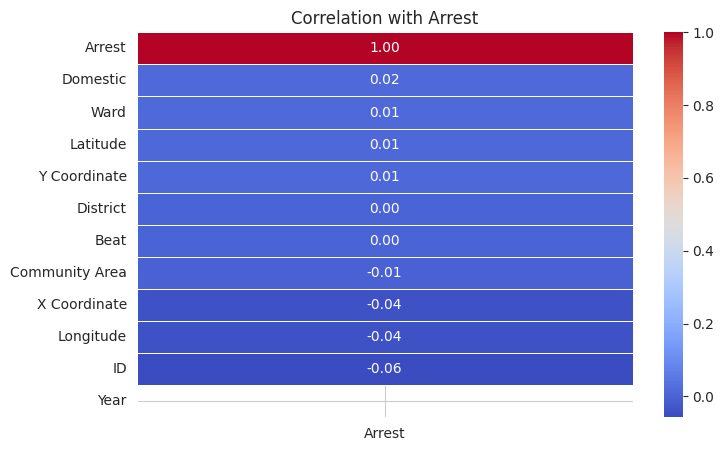

In [83]:
correlation_matrix = df.corr(numeric_only=True)
correlation_arrest = correlation_matrix['Arrest'].sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_arrest.to_frame(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation with Arrest')
plt.show()

In [84]:
numeric_columns = ['Beat', 'District', 'Ward', 'Community Area', 'X Coordinate', 'Y Coordinate','Latitude', 'Longitude']

In [85]:
corr_matrix = df[numeric_columns].corr()

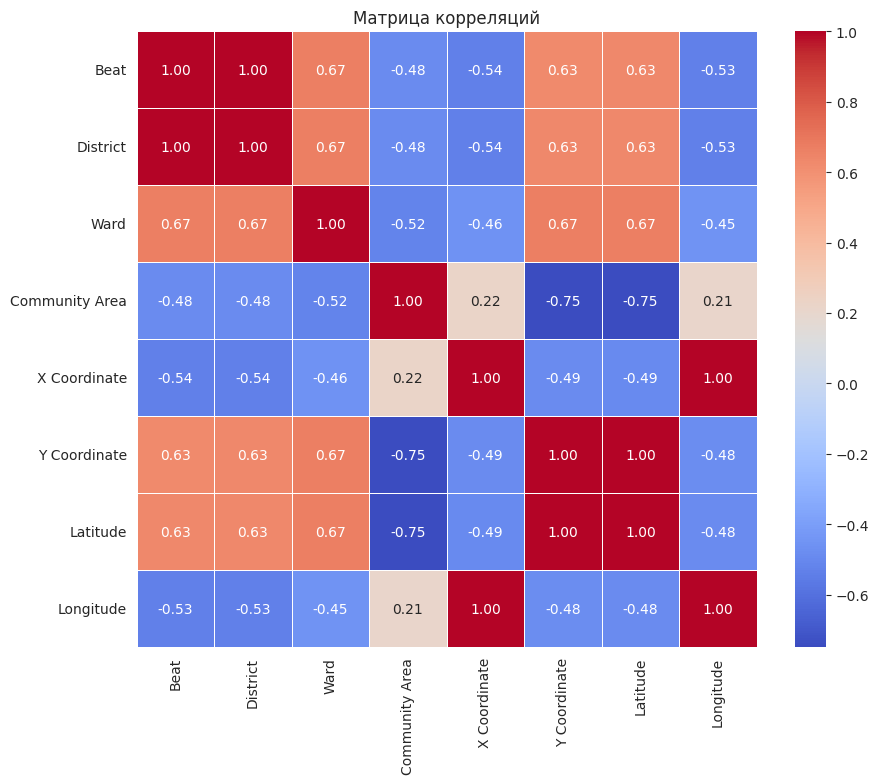

In [86]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Матрица корреляций')
plt.show()

<ipython-input-101-cbb86361fd3f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_beats.index, y=top_beats.values, palette="viridis", ax=ax)
<ipython-input-101-cbb86361fd3f>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top_beats.index, rotation=45)


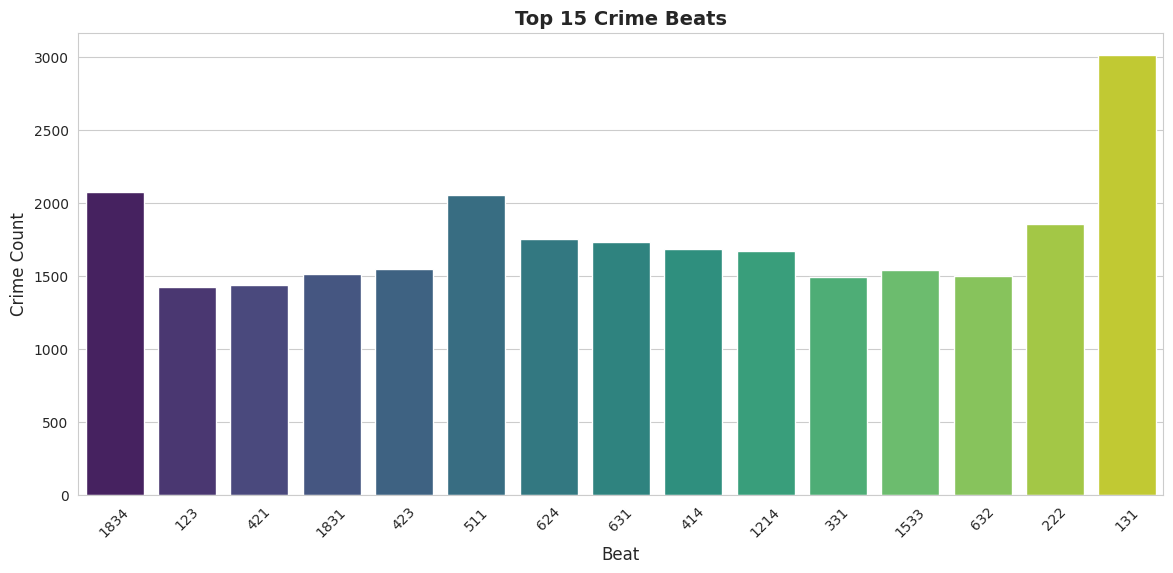

In [101]:
top_beats = copy_df["Beat"].value_counts().nlargest(15)

fig, ax = plt.subplots(figsize=(14, 6))

sns.barplot(x=top_beats.index, y=top_beats.values, palette="viridis", ax=ax)

ax.set_title("Top 15 Crime Beats", fontsize=14, fontweight='bold')
ax.set_xlabel("Beat", fontsize=12)
ax.set_ylabel("Crime Count", fontsize=12)

ax.set_xticklabels(top_beats.index, rotation=45)

plt.show()


In [116]:
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Day'] = pd.to_datetime(df['Date']).dt.day

In [117]:
df['Month'].value_counts()

,count
Month,
10,22631
7,21839
8,21837
9,21807
11,20403
6,20402
5,19839
12,19751
3,17888


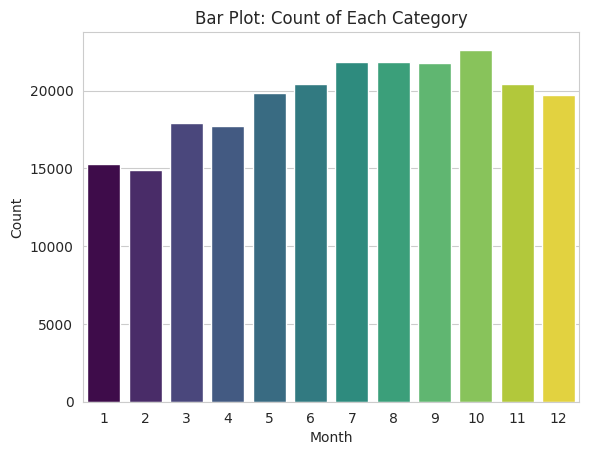

In [118]:
sns.countplot(data=df, x='Month', palette='viridis',legend=False,hue='Month')
plt.title('Bar Plot: Count of Each Category')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

In [119]:
df['Day'].value_counts()

,count
Day,
1,8753
12,7900
10,7808
22,7790
18,7761
16,7726
11,7722
20,7714
19,7714


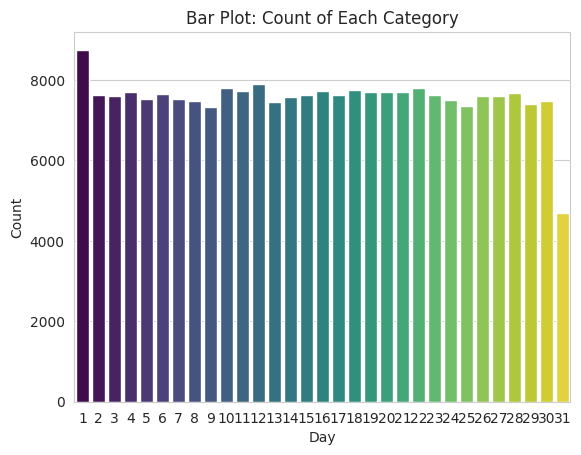

In [120]:
sns.countplot(data=df, x='Day', palette='viridis',legend=False,hue='Day')
plt.title('Bar Plot: Count of Each Category')
plt.xlabel('Day')
plt.ylabel('Count')
plt.show()

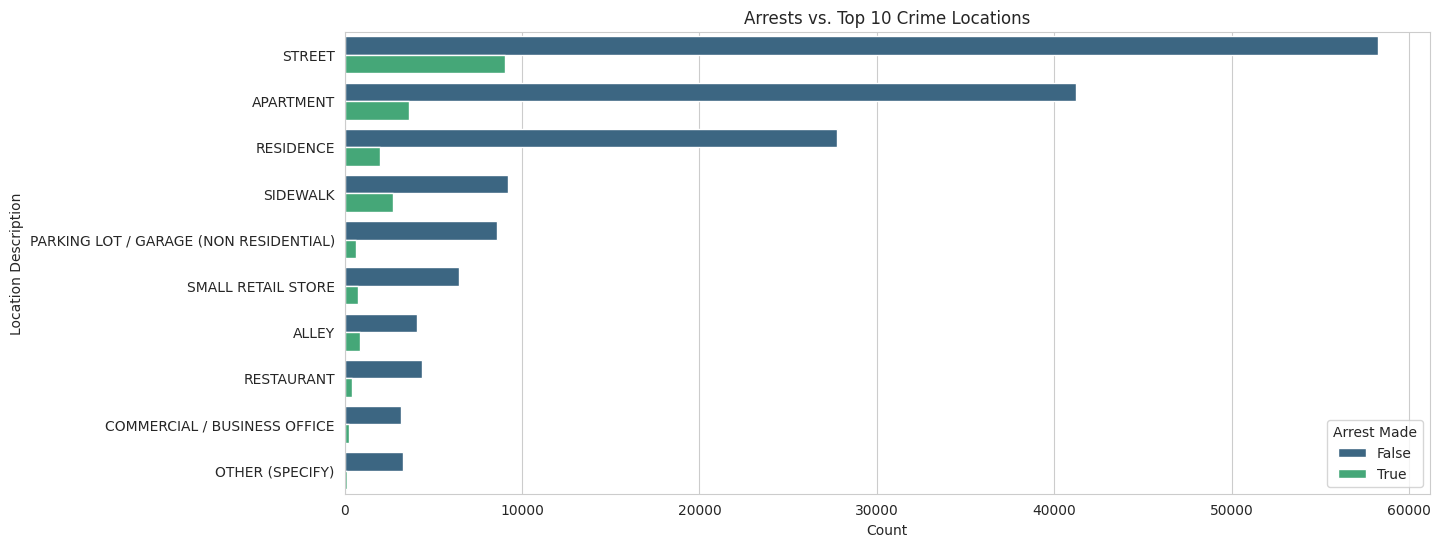

In [133]:
if "location_group" not in copy_df.columns:
    copy_df["location_group"] = copy_df["Location Description"]
top_locations = copy_df["location_group"].value_counts().head(10).index.tolist()
filtered_df = copy_df[copy_df["location_group"].isin(top_locations)]
plt.figure(figsize=(14, 6))
sns.countplot(data=filtered_df, y="location_group", hue="Arrest", order=top_locations, palette="viridis")
plt.title("Arrests vs. Top 10 Crime Locations")
plt.xlabel("Count")
plt.ylabel("Location Description")
plt.legend(title="Arrest Made")
plt.show()

<ipython-input-135-326c7b6e28f5>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Time_of_Day', palette='Blues', order=['Ночь', 'Утро', 'День', 'Вечер'])


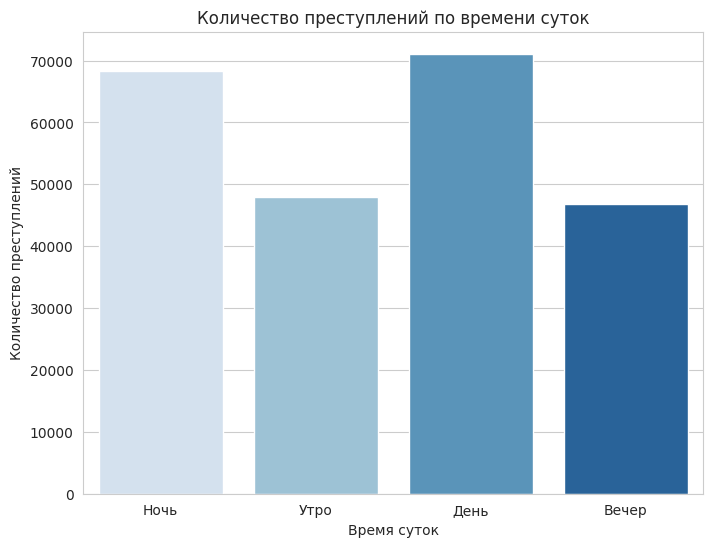

<ipython-input-135-326c7b6e28f5>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Hour', palette='Blues_r')


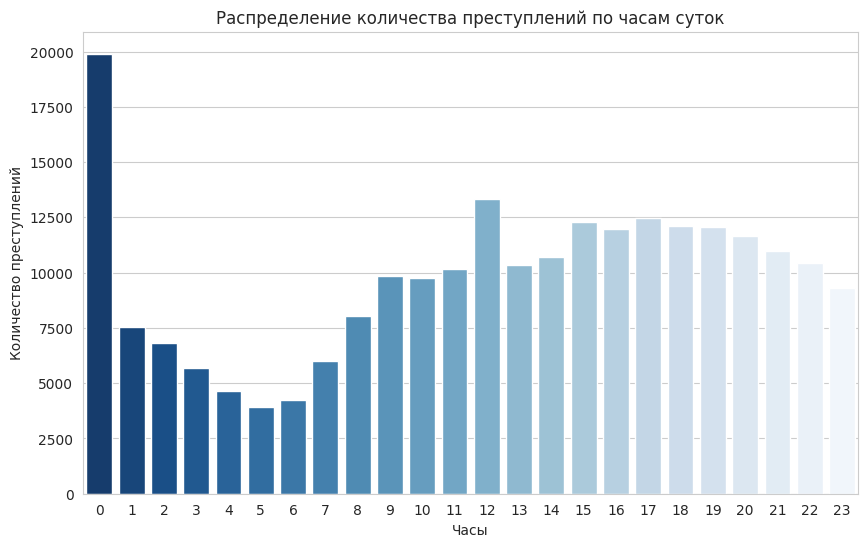

In [135]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Hour'] = df['Date'].dt.hour
def time_of_day(hour):
    if 6 <= hour < 12:
        return 'Утро'
    elif 12 <= hour < 18:
        return 'День'
    elif 18 <= hour < 22:
        return 'Вечер'
    else:
        return 'Ночь'
df['Time_of_Day'] = df['Hour'].apply(time_of_day)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Time_of_Day', palette='Blues', order=['Ночь', 'Утро', 'День', 'Вечер'])
plt.title('Количество преступлений по времени суток')
plt.xlabel('Время суток')
plt.ylabel('Количество преступлений')
plt.show()
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Hour', palette='Blues_r')
plt.title('Распределение количества преступлений по часам суток')
plt.xlabel('Часы')
plt.ylabel('Количество преступлений')
plt.xticks(range(0, 24))
plt.show()